In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

COCOMO81


In [108]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file using scipy's arff loader
dataset, meta = arff.loadarff('./cocomo811.arff')

# Convert the dataset to a pandas DataFrame
cocomo = pd.DataFrame(dataset)

# Display the first few rows
print(cocomo.head())


   rely  data  cplx  time  stor  virt  turn  acap  aexp  pcap  vexp  lexp  \
0  0.88  1.16  0.70   1.0  1.06  1.15  1.07  1.19  1.13  1.17   1.1  1.00   
1  0.88  1.16  0.85   1.0  1.06  1.00  1.07  1.00  0.91  1.00   0.9  0.95   
2  1.00  1.16  0.85   1.0  1.00  0.87  0.94  0.86  0.82  0.86   0.9  0.95   
3  0.75  1.16  0.70   1.0  1.00  0.87  1.00  1.19  0.91  1.42   1.0  0.95   
4  0.88  0.94  1.00   1.0  1.00  0.87  1.00  1.00  1.00  0.86   0.9  0.95   

   modp  tool  sced    loc  actual  
0  1.24  1.10  1.04  113.0  2040.0  
1  1.10  1.00  1.00  293.0  1600.0  
2  0.91  0.91  1.00  132.0   243.0  
3  1.24  1.00  1.04   60.0   240.0  
4  1.24  1.00  1.00   16.0    33.0  


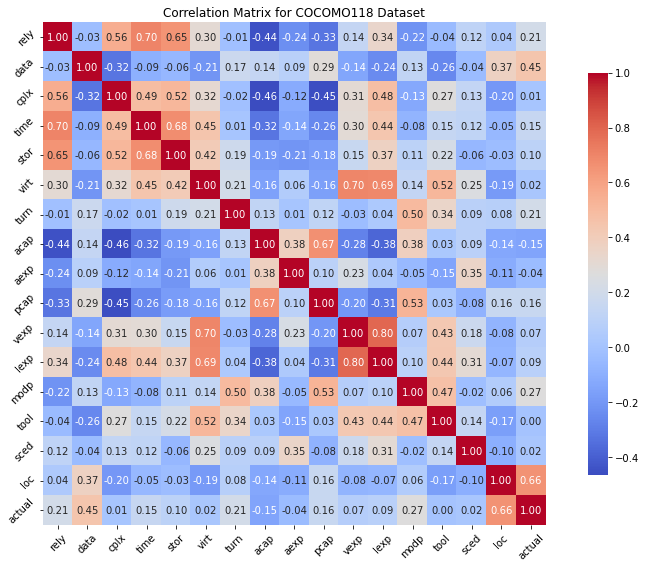

In [109]:
import seaborn as sns
correlation_matrix = cocomo.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for COCOMO118 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = cocomo.corr()

# Set a threshold for correlation
threshold = 0.8

# Create a set to hold features to drop
to_drop = set()

# Drop features with high correlation with each other (above threshold)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for correlation above the threshold
            colname = correlation_matrix.columns[i]  # Get the name of the column
            to_drop.add(colname)

# Also drop features with low correlation with the target variable 'Actual' (< 0.05)
low_correlation_threshold = 0.05
for col in correlation_matrix.columns:
    if col != 'actual':  # Skip the target variable itself
        if abs(correlation_matrix.loc[col, 'actual']) < low_correlation_threshold:
            to_drop.add(col)

# Remaining features after dropping correlated and low-correlation ones
selected_features = [col for col in cocomo.columns if col not in to_drop]

print("Features to keep:", selected_features)


Features to keep: ['rely', 'data', 'time', 'stor', 'turn', 'acap', 'pcap', 'vexp', 'lexp', 'modp', 'loc', 'actual']


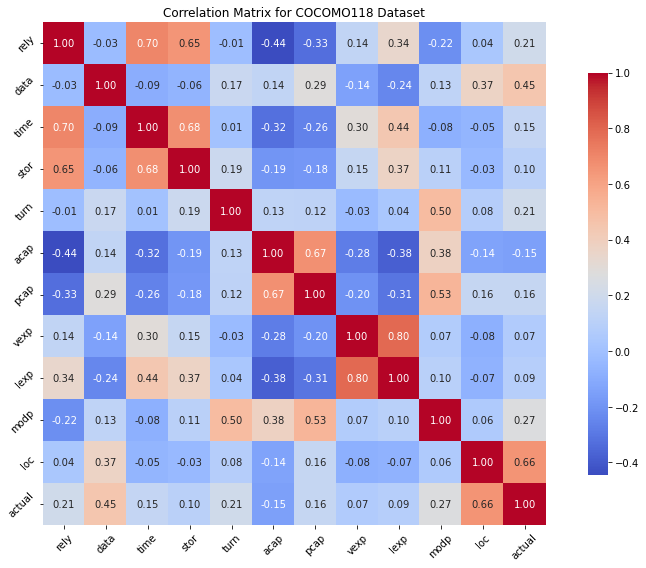

In [111]:
import seaborn as sns
cocomo=cocomo[selected_features]
correlation_matrix = cocomo.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for COCOMO118 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [112]:
# Separating features (X) and output (Y)
X_cocomo = cocomo.iloc[:, :-1]  # All columns except the last one (features)
Y_cocomo = cocomo.iloc[:, -1]    # Last column (output)

# Displaying the first few rows of the features and output
print("Features (X):")
print(X_cocomo.head())
print("\nOutput (Y):")
print(Y_cocomo.head())

Features (X):
   rely  data  time  stor  turn  acap  pcap  vexp  lexp  modp    loc
0  0.88  1.16   1.0  1.06  1.07  1.19  1.17   1.1  1.00  1.24  113.0
1  0.88  1.16   1.0  1.06  1.07  1.00  1.00   0.9  0.95  1.10  293.0
2  1.00  1.16   1.0  1.00  0.94  0.86  0.86   0.9  0.95  0.91  132.0
3  0.75  1.16   1.0  1.00  1.00  1.19  1.42   1.0  0.95  1.24   60.0
4  0.88  0.94   1.0  1.00  1.00  1.00  0.86   0.9  0.95  1.24   16.0

Output (Y):
0    2040.0
1    1600.0
2     243.0
3     240.0
4      33.0
Name: actual, dtype: float64


In [113]:
# Function to detect outliers using IQR for the entire dataframe
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers for each column
        if not outliers.empty:
            outliers_dict[column] = outliers
    return outliers_dict

# Detecting outliers for all numeric columns
outliers_dict = detect_outliers_iqr(X_cocomo)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers[[column]])   # Display only the project and the outlier column
    print("\n")

Outliers in 'time':
    time
7   1.66
8   1.30
13  1.30
14  1.30
15  1.30
16  1.30
17  1.30
26  1.35
30  1.48
32  1.48
49  1.30
55  1.30
57  1.66


Outliers in 'stor':
    stor
7   1.56
9   1.56
10  1.56
13  1.56
15  1.56
16  1.56
30  1.56
32  1.56


Outliers in 'acap':
   acap
5  1.46


Outliers in 'pcap':
    pcap
3   1.42
5   1.42
50  1.42


Outliers in 'lexp':
    lexp
7   1.14
14  1.14
61  1.14


Outliers in 'loc':
       loc
1    293.0
17   320.0
18  1150.0
19   299.0
20   252.0
31   390.0
47   464.0




In [114]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_cocomo)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


   Feature  Outlier Count
0     rely              0
1     data              0
2     time             13
3     stor              8
4     turn              0
5     acap              1
6     pcap              3
7     vexp              0
8     lexp              3
9     modp              0
10     loc              7


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from pyearth import Earth

# Assuming filtered_features and filtered_output are your datasets
X = X_cocomo
y = Y_cocomo

# Define hyperparameter grids for each individual model
param_grids = {
    'Linear Regression': {},  # No parameters to tune
    'SVR': {
        'kernel': ['linear', 'rbf'],  # Reduced from 'linear', 'rbf', 'poly'
        'C': [0.1, 1],  # Reduced from [0.1, 1, 10]
        'epsilon': [0.01, 0.1],  # Reduced from [0.001, 0.01, 0.1]
        'gamma': ['scale']  # Reduced to a single value for faster tuning
    },
    'Gradient Boosting': {
        'n_estimators': [100],  # Fixed number of estimators
        'learning_rate': [0.1],  # Fixed learning rate for faster training
        'max_depth': [3],  # Fixed depth for simpler tuning
        'min_samples_split': [10]  # Reduced options for faster tuning
    },
    'Stacked Ensemble': {
        'meta_learner__fit_intercept': [True]  # Fixed to a single setting
    },
}

# PCR Model with PCA and Linear Regression
pcr_model = make_pipeline(PCA(n_components=0.95), LinearRegression())

# Define base learners for Stacked Ensemble, with PCR, MARS (Earth), and other models
base_learners = [
    ('PCR', pcr_model),  # Add PCR at the start
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Neural Net', MLPRegressor(max_iter=500)),
    ('Elastic Net', ElasticNet()),
    ('XGBoost', xgb.XGBRegressor()),
    ('Earth', Earth())  # Add Earth (MARS) after XGBoost
]

# Function to evaluate models
def evaluate_model(y_test, y_pred, computation_time):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    median_ae = np.median(np.abs(y_test - y_pred))
    return {
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2,
        'PRED(25)': pred_25, 'MAPE': mape, 'Explained Variance': explained_variance,
        'Max Error': max_error, 'Median AE': median_ae,
        'Computation Time (s)': computation_time
    }

# Results storage
results = []

# Loop over train-test splits
for train_size in [0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)

    # Linear Regression
    start_time = time.time()
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    results.append({
        'Model': 'Linear Regression',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Support Vector Regressor with GridSearchCV
    start_time = time.time()
    svr = GridSearchCV(SVR(), param_grids['SVR'], scoring='r2', cv=3, n_jobs=-1).fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    results.append({
        'Model': 'SVR',
        'Best Params': svr.best_params_,
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Gradient Boosting with GridSearchCV
    start_time = time.time()
    gbr = GridSearchCV(GradientBoostingRegressor(), param_grids['Gradient Boosting'], scoring='r2', cv=3, n_jobs=-1).fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    results.append({
        'Model': 'Gradient Boosting',
        'Best Params': gbr.best_params_,
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Stacked Ensemble
    start_time = time.time()
    base_train_preds, base_test_preds = [], []
    for name, model in base_learners:
        model.fit(X_train, y_train)
        base_train_preds.append(model.predict(X_train))
        base_test_preds.append(model.predict(X_test))
    meta_X_train = np.column_stack(base_train_preds)
    meta_X_test = np.column_stack(base_test_preds)
    meta_learner = LinearRegression().fit(meta_X_train, y_train)
    final_predictions = meta_learner.predict(meta_X_test)
    results.append({
        'Model': 'Stacked Ensemble',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, final_predictions, time.time() - start_time)
    })

    # PCR + MARS Hybrid Model
    start_time = time.time()

    # PCR model
    pcr_model.fit(X_train, y_train)
    y_pred_pcr = pcr_model.predict(X_test)

    # Earth (MARS) model
    earth_model = Earth()
    earth_model.fit(X_train, y_train)
    y_pred_mars = earth_model.predict(X_test)

    # Combine PCR + MARS predictions
    w = 0.9  # Weight for PCR (adjust as needed)
    final_y_pred_hybrid = w * y_pred_pcr + (1 - w) * y_pred_mars

    results.append({
        'Model': 'PCR + MARS Hybrid',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, final_y_pred_hybrid, time.time() - start_time)
    })

# Save results to DataFrame and Excel file
results_df = pd.DataFrame(results)
results_df.to_excel('effort_estimation_results_cocomo.xlsx', index=False)
print(results_df)


c:\Anaconda3\envs\mars\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B,

                Model Train Size (%) Test Size (%)         MAE           MSE  \
0   Linear Regression            50%           50%  715.093223  3.603951e+06   
1                 SVR            50%           50%  655.417117  3.729340e+06   
2   Gradient Boosting            50%           50%  605.927035  3.246009e+06   
3    Stacked Ensemble            50%           50%  644.053125  3.257012e+06   
4   PCR + MARS Hybrid            50%           50%  659.581754  3.733357e+06   
5   Linear Regression            60%           40%  803.395797  4.678568e+06   
6                 SVR            60%           40%  708.733818  4.478870e+06   
7   Gradient Boosting            60%           40%  699.033695  4.060389e+06   
8    Stacked Ensemble            60%           40%  792.461538  5.760331e+06   
9   PCR + MARS Hybrid            60%           40%  721.825016  4.622759e+06   
10  Linear Regression            70%           30%  776.237160  4.195221e+06   
11                SVR            70%    

c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the futur

China

In [116]:

import pandas as pd
from scipy.io import arff

# Load the ARFF file using scipy's arff loader
dataset, meta = arff.loadarff('./china.arff')

# Convert the dataset to a pandas DataFrame
china = pd.DataFrame(dataset)

# Display the first few rows
print(china.head())


      AFP  Input  Output  Enquiry   File  Interface   Added  Changed  Deleted  \
0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0      0.0   
1   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0     61.0   
2   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0      0.0   
3   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0      4.0   
4   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0      0.0   

  Resource  Duration    DevType  AdjFactor  Effort  
0     b'4'       4.0  b'NewDev'   1.056591  7490.0  
1     b'2'      17.0   b'Maint'   1.040000  4150.0  
2     b'1'       9.0  b'NewDev'   0.932515   668.0  
3     b'1'       4.0   b'Maint'   1.115044  3238.0  
4     b'1'      13.0   b'Maint'   0.951140  2994.0  


In [117]:
# Missing values and data types
china.info()
china.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        499 non-null    float64
 1   Input      499 non-null    float64
 2   Output     499 non-null    float64
 3   Enquiry    499 non-null    float64
 4   File       499 non-null    float64
 5   Interface  499 non-null    float64
 6   Added      499 non-null    float64
 7   Changed    499 non-null    float64
 8   Deleted    499 non-null    float64
 9   Resource   499 non-null    object 
 10  Duration   499 non-null    float64
 11  DevType    499 non-null    object 
 12  AdjFactor  499 non-null    float64
 13  Effort     499 non-null    float64
dtypes: float64(12), object(2)
memory usage: 54.7+ KB


AFP          0
Input        0
Output       0
Enquiry      0
File         0
Interface    0
Added        0
Changed      0
Deleted      0
Resource     0
Duration     0
DevType      0
AdjFactor    0
Effort       0
dtype: int64

In [118]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
china.describe()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Duration,AdjFactor,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,8.719238,1.017885,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,7.347058,0.100899,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.648148,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.000000,0.960371,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,7.000000,1.013889,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,11.000000,1.071083,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,84.000000,1.718923,54620.000000


In [119]:
# Duplicate rows
china.duplicated().sum()

0

In [120]:
# # Adequacy of data using heatmap
# sns.heatmap(china.corr())

In [121]:
print(china.dtypes)
print(china.head())

#Encontured categorical data which is not in numeric form


AFP          float64
Input        float64
Output       float64
Enquiry      float64
File         float64
Interface    float64
Added        float64
Changed      float64
Deleted      float64
Resource      object
Duration     float64
DevType       object
AdjFactor    float64
Effort       float64
dtype: object
      AFP  Input  Output  Enquiry   File  Interface   Added  Changed  Deleted  \
0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0      0.0   
1   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0     61.0   
2   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0      0.0   
3   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0      4.0   
4   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0      0.0   

  Resource  Duration    DevType  AdjFactor  Effort  
0     b'4'       4.0  b'NewDev'   1.056591  7490.0  
1     b'2'      17.0   b'Maint'   1.040000  4150.0  
2     b'1'       9.0  b'NewDev'   0.932515   6

In [122]:
#Converting categorical data into numerical data
print(china['DevType'].unique())


[b'NewDev' b'Maint']


In [123]:
china['devtype_numeric'], devtype_mapping = pd.factorize(china['DevType'])
print(devtype_mapping)


Index([b'NewDev', b'Maint'], dtype='object')


In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
china['devtype_numeric'] = le.fit_transform(china['DevType'])
print(le.classes_)


[b'Maint' b'NewDev']


In [125]:
china = china.drop(columns=['DevType'])


In [126]:
china.head()
#Successfully converted categorical data into numerical where 0='NewDev' & 1= 'Maint'


,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,AdjFactor,Effort,devtype_numeric
0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,b'4',4.0,1.056591,7490.0,1
1,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,b'2',17.0,1.040000,4150.0,0
2,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,b'1',9.0,0.932515,668.0,1
3,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,b'1',4.0,1.115044,3238.0,0
4,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,b'1',13.0,0.951140,2994.0,0


<AxesSubplot:>

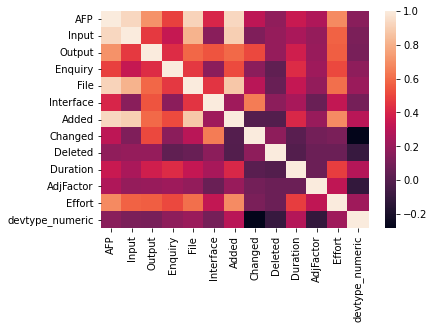

In [127]:
# Adequacy of data using heatmap
sns.heatmap(china.corr())

In [128]:
# # Checking for class imbalance
# for col in china.columns:
#     china[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     # plt.show()

In [129]:
#Problem : Although Resource appears in numerical form it is of type object {1,2,3,4}, i.e. chnaging it to numeric

china[china.columns]=china[china.columns].apply(pd.to_numeric, errors='coerce')

In [130]:
print(china.head())

      AFP  Input  Output  Enquiry   File  Interface   Added  Changed  Deleted  \
0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0      0.0   
1   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0     61.0   
2   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0      0.0   
3   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0      4.0   
4   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0      0.0   

   Resource  Duration  AdjFactor  Effort  devtype_numeric  
0         4       4.0   1.056591  7490.0                1  
1         2      17.0   1.040000  4150.0                0  
2         1       9.0   0.932515   668.0                1  
3         1       4.0   1.115044  3238.0                0  
4         1      13.0   0.951140  2994.0                0  


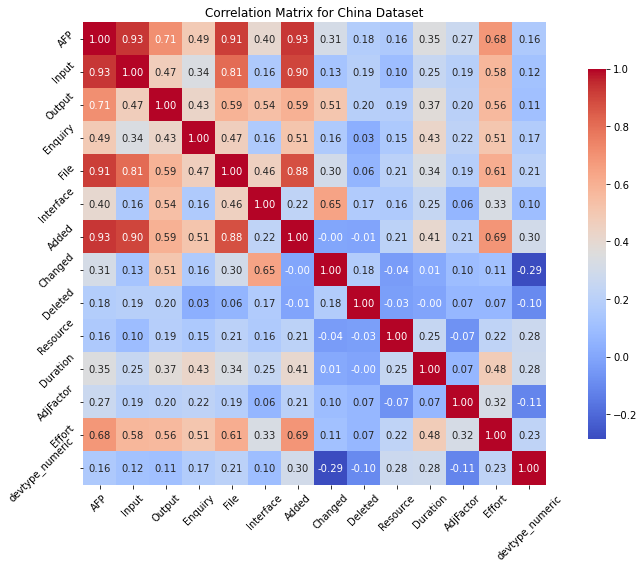

In [131]:
import seaborn as sns
correlation_matrix = china.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for China Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = china.corr()

# Set a threshold for correlation
threshold = 0.8

# Create a set to hold features to drop
to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for correlation above the threshold
            colname = correlation_matrix.columns[i]  # Get the name of the column
            to_drop.add(colname)

# Remaining features after dropping correlated ones
selected_features = [col for col in china.columns if col not in to_drop]

print("Features to keep:", selected_features)


Features to keep: ['AFP', 'Output', 'Enquiry', 'Interface', 'Changed', 'Deleted', 'Resource', 'Duration', 'AdjFactor', 'Effort', 'devtype_numeric']


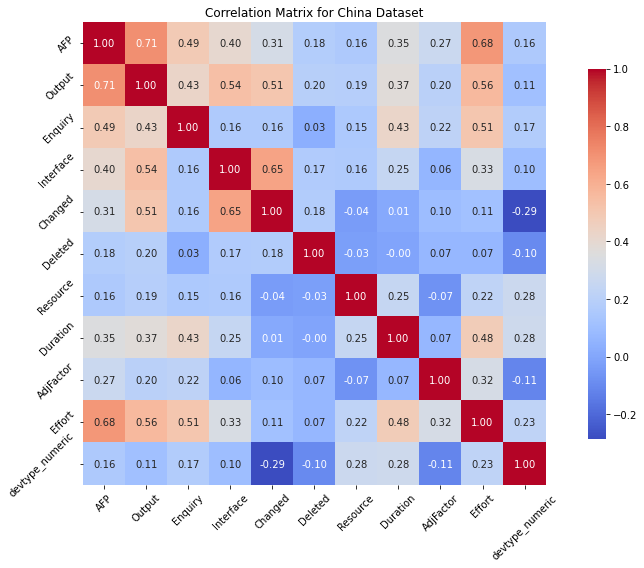

In [133]:
filtered_df_china=china[selected_features]

import seaborn as sns
correlation_matrix = filtered_df_china.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for China Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [134]:
X_china = china.drop(columns=['Effort'])  # Features: all columns except 'Effort'
Y_china = china['Effort']

In [135]:
X_china_filtered = filtered_df_china.drop(columns=['Effort'])  # Features: all columns except 'Effort'
Y_china_filtered = filtered_df_china['Effort']

In [136]:
# Function to detect outliers using IQR for the entire dataframe
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers for each column
        if not outliers.empty:
            outliers_dict[column] = outliers
    return outliers_dict

# Detecting outliers for all numeric columns
outliers_dict = detect_outliers_iqr(X_china)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers[column])  # Display only the project and the outlier column
    print("\n")

Outliers in 'AFP':
0      1587.0
21     3156.0
37     2190.0
45     2529.0
55     2145.0
        ...  
466    1108.0
475    1222.0
476    1093.0
478    2067.0
495    1106.0
Name: AFP, Length: 62, dtype: float64


Outliers in 'Input':
0       774.0
21     2075.0
37      706.0
45      554.0
55      862.0
71      356.0
75     1061.0
81      484.0
93      379.0
94      862.0
103    2019.0
105     346.0
108    2221.0
112     458.0
127     402.0
130     638.0
142     422.0
146    1098.0
154     716.0
160     920.0
169     625.0
178     711.0
184     353.0
215     345.0
229     460.0
237     932.0
244     349.0
249     541.0
259     452.0
268    1049.0
292     546.0
294     379.0
304    1240.0
317    1184.0
323     555.0
325     349.0
343     626.0
347     352.0
352     575.0
354     685.0
368     345.0
372     516.0
373     392.0
381     916.0
390     594.0
396     579.0
397     780.0
422     391.0
434    9404.0
436     534.0
438     535.0
446     433.0
451     804.0
456     401.0
461    132

In [137]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_china)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


            Feature  Outlier Count
0               AFP             62
1             Input             59
2            Output             54
3           Enquiry             50
4              File             56
5         Interface             60
6             Added             63
7           Changed             46
8           Deleted             64
9          Resource             31
10         Duration             21
11        AdjFactor              9
12  devtype_numeric              0


In [138]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_china_filtered)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


           Feature  Outlier Count
0              AFP             62
1           Output             54
2          Enquiry             50
3        Interface             60
4          Changed             46
5          Deleted             64
6         Resource             31
7         Duration             21
8        AdjFactor              9
9  devtype_numeric              0


In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from pyearth import Earth

# Assuming filtered_features and filtered_output are your datasets
X = X_china_filtered
y=Y_china_filtered

# Define hyperparameter grids for each individual model
param_grids = {
    'Linear Regression': {},  # No parameters to tune
    'SVR': {
        'kernel': ['linear', 'rbf'],  # Reduced from 'linear', 'rbf', 'poly'
        'C': [0.1, 1],  # Reduced from [0.1, 1, 10]
        'epsilon': [0.01, 0.1],  # Reduced from [0.001, 0.01, 0.1]
        'gamma': ['scale']  # Reduced to a single value for faster tuning
    },
    'Gradient Boosting': {
        'n_estimators': [100],  # Fixed number of estimators
        'learning_rate': [0.1],  # Fixed learning rate for faster training
        'max_depth': [3],  # Fixed depth for simpler tuning
        'min_samples_split': [10]  # Reduced options for faster tuning
    },
    'Stacked Ensemble': {
        'meta_learner__fit_intercept': [True]  # Fixed to a single setting
    },
}

# PCR Model with PCA and Linear Regression
pcr_model = make_pipeline(PCA(n_components=0.95), LinearRegression())

# Define base learners for Stacked Ensemble, with PCR, MARS (Earth), and other models
base_learners = [
    ('PCR', pcr_model),  # Add PCR at the start
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Neural Net', MLPRegressor(max_iter=1000)),
    ('Elastic Net', ElasticNet()),
    ('XGBoost', xgb.XGBRegressor()),
    ('Earth', Earth())  # Add Earth (MARS) after XGBoost
]

# Function to evaluate models
def evaluate_model(y_test, y_pred, computation_time):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    median_ae = np.median(np.abs(y_test - y_pred))
    return {
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-Squared': r2,
        'PRED(25)': pred_25, 'MAPE': mape, 'Explained Variance': explained_variance,
        'Max Error': max_error, 'Median AE': median_ae,
        'Computation Time (s)': computation_time
    }

# Results storage
results = []

# Loop over train-test splits
for train_size in [0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)

    # Linear Regression
    start_time = time.time()
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    results.append({
        'Model': 'Linear Regression',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Support Vector Regressor with GridSearchCV
    start_time = time.time()
    svr = GridSearchCV(SVR(), param_grids['SVR'], scoring='r2', cv=3, n_jobs=-1).fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    results.append({
        'Model': 'SVR',
        'Best Params': svr.best_params_,
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Gradient Boosting with GridSearchCV
    start_time = time.time()
    gbr = GridSearchCV(GradientBoostingRegressor(), param_grids['Gradient Boosting'], scoring='r2', cv=3, n_jobs=-1).fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    results.append({
        'Model': 'Gradient Boosting',
        'Best Params': gbr.best_params_,
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, y_pred, time.time() - start_time)
    })

    # Stacked Ensemble
    start_time = time.time()
    base_train_preds, base_test_preds = [], []
    for name, model in base_learners:
        model.fit(X_train, y_train)
        base_train_preds.append(model.predict(X_train))
        base_test_preds.append(model.predict(X_test))
    meta_X_train = np.column_stack(base_train_preds)
    meta_X_test = np.column_stack(base_test_preds)
    meta_learner = LinearRegression().fit(meta_X_train, y_train)
    final_predictions = meta_learner.predict(meta_X_test)
    results.append({
        'Model': 'Stacked Ensemble',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, final_predictions, time.time() - start_time)
    })

    # PCR + MARS Hybrid Model
    start_time = time.time()

    # PCR model
    pcr_model.fit(X_train, y_train)
    y_pred_pcr = pcr_model.predict(X_test)

    # Earth (MARS) model
    earth_model = Earth()
    earth_model.fit(X_train, y_train)
    y_pred_mars = earth_model.predict(X_test)

    # Combine PCR + MARS predictions
    w = 0.9  # Weight for PCR (adjust as needed)
    final_y_pred_hybrid = w * y_pred_pcr + (1 - w) * y_pred_mars

    results.append({
        'Model': 'PCR + MARS Hybrid',
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        **evaluate_model(y_test, final_y_pred_hybrid, time.time() - start_time)
    })

# Save results to DataFrame and Excel file
results_df = pd.DataFrame(results)
results_df.to_excel('effort_estimation_result_china.xlsx', index=False)
print(results_df)


c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future

                Model Train Size (%) Test Size (%)          MAE           MSE  \
0   Linear Regression            50%           50%  2934.928026  2.943954e+07   
1                 SVR            50%           50%  2160.144932  1.730367e+07   
2   Gradient Boosting            50%           50%  2669.733540  2.399411e+07   
3    Stacked Ensemble            50%           50%  3610.444000  5.225384e+07   
4   PCR + MARS Hybrid            50%           50%  2711.314579  1.794473e+07   
5   Linear Regression            60%           40%  2887.253156  3.121502e+07   
6                 SVR            60%           40%  2270.370278  1.971241e+07   
7   Gradient Boosting            60%           40%  2687.330312  2.766885e+07   
8    Stacked Ensemble            60%           40%  3729.350000  5.219565e+07   
9   PCR + MARS Hybrid            60%           40%  2446.910527  1.509992e+07   
10  Linear Regression            70%           30%  2410.957103  1.825034e+07   
11                SVR       

c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Anaconda3\envs\mars\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the futur